In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pyaxis import pyaxis
import matplotlib.font_manager as fm 

In [85]:
# Load the "Jost" font needed for this plot
font_dir = ['./Jost_Font/']  # Font is located in Jost_Font folder
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

In [3]:
gpd.options.io_engine = "pyogrio"

In [8]:
data = pd.read_csv("./NRW2023-wahlbeteiligung.csv", sep=';')

In [51]:
avg_participation = data["wahlbeteiligung"][0]

In [14]:
data_canton = data[data["ebene_resultat"].isin(["Kanton"])]
data_town = data[data["ebene_resultat"].isin(["Gemeinde"])]

In [15]:
folder = Path("./boundaries")
bezirke = folder / "k4b23.shx"
gemeinde = folder / "k4g23.shx"
kanton = folder / "k4k23.shx"
land = folder / "k4l23.shx"
seen = folder / "k4s23.shx"

In [16]:
map_land = gpd.read_file(str(land))
map_kanton = gpd.read_file(str(kanton))
map_gemeinde = gpd.read_file(str(gemeinde))
map_see = gpd.read_file(str(seen))

In [17]:
data_town = data_town.rename(columns={'gemeinde_bezeichnung': 'GMDNAME'})
map_gemeinde = map_gemeinde.merge(data_town, on="GMDNAME")

In [ ]:
# Create figure and axis
f, ax = plt.subplots(figsize=(36, 27), dpi=300)
map_gemeinde.plot(column="wahlbeteiligung", ax=ax, linewidth=0.75, edgecolor='black', cmap=cmap, legend=True, vmin=30, vmax=70)
map_kanton.plot(ax=ax, linewidth=3, edgecolor='black', color=(0, 0, 0, 0))

In [18]:
data_canton = data_canton.rename(columns= {'kanton_bezeichnung': 'KTNAME'})
map_kanton = map_kanton.merge(data_canton, on="KTNAME")

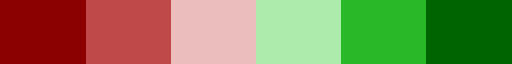

In [74]:
from matplotlib.colors import LinearSegmentedColormap

#cmap = LinearSegmentedColormap.from_list(name="my_cmap", 
#                                                colors=["#AD0000", "white", "#0CAD00"], N=6)

cmap = LinearSegmentedColormap.from_list(name="my_cmap", 
                                                colors=["darkred", "indianred", "white", "limegreen", "darkgreen"], N=6)

cmap

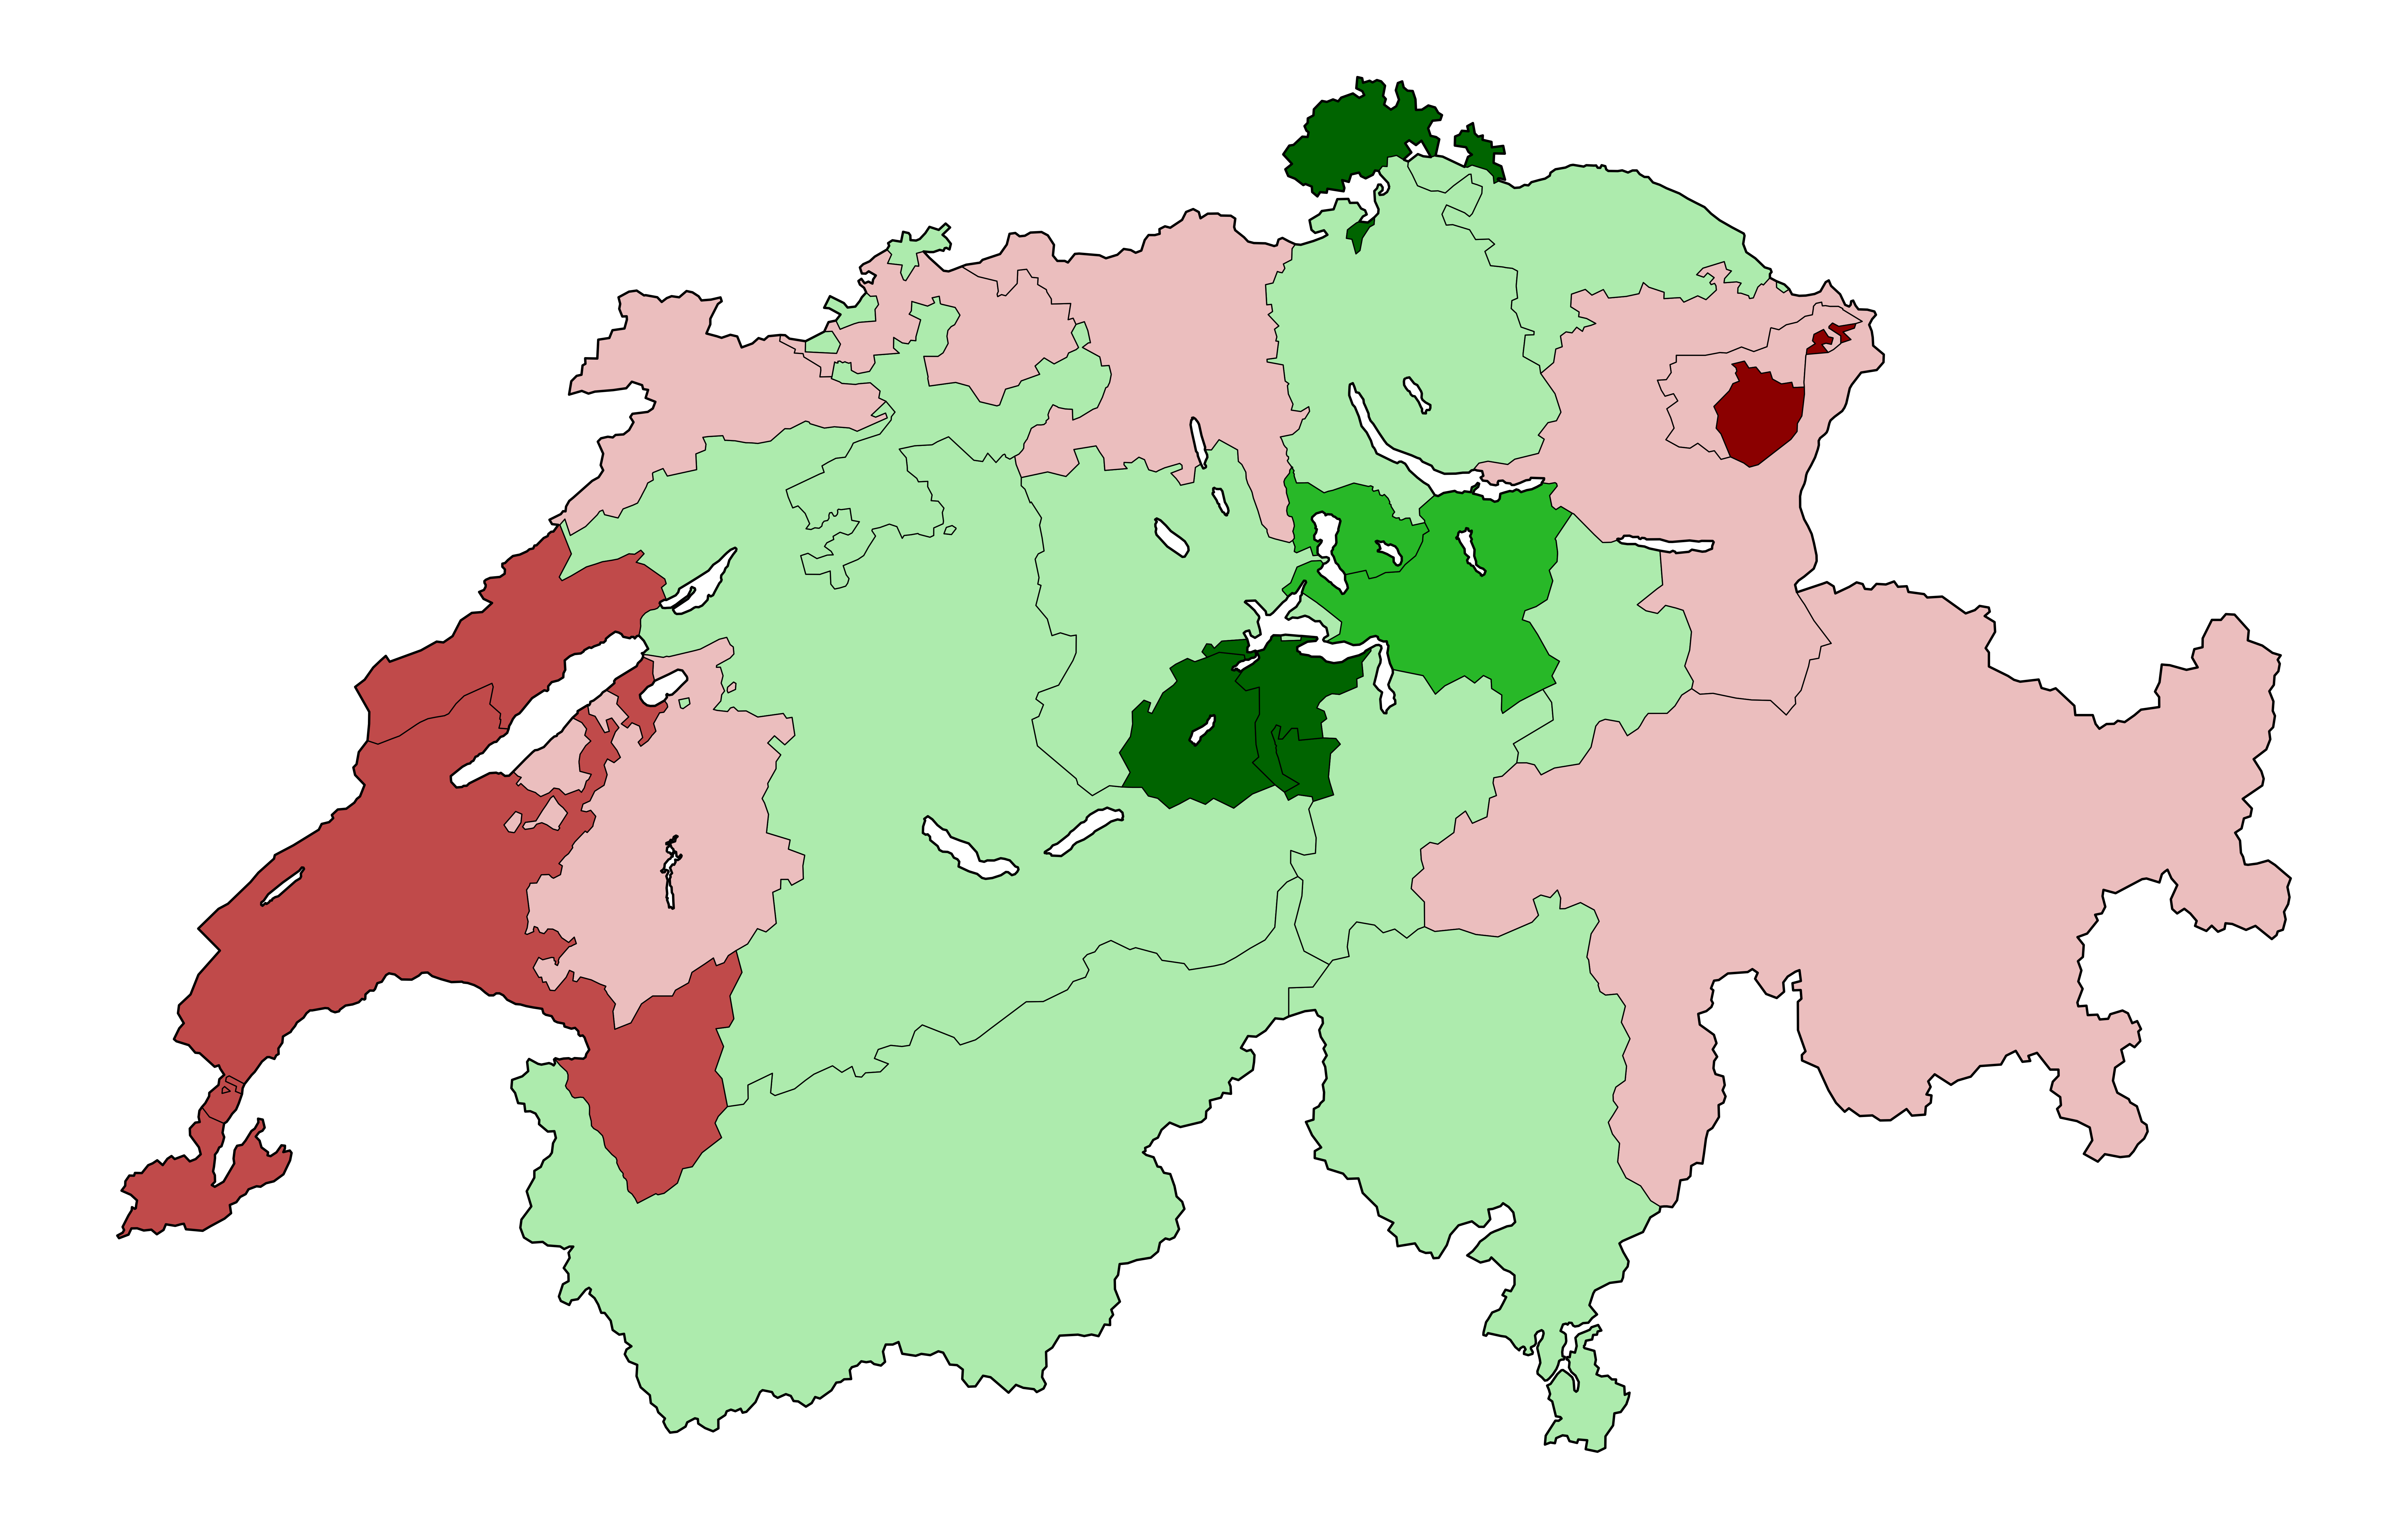

In [80]:
# Create figure and axis
f, ax = plt.subplots(figsize=(36, 27), dpi=300)
map_kanton.plot(column="wahlbeteiligung", ax=ax, linewidth=1, edgecolor='black', cmap=cmap, vmin=avg_participation - 12, vmax= avg_participation + 12)
map_land.plot(ax=ax, linewidth=2, edgecolor='black', color=(0, 0, 0, 0))

plt.tick_params(which='both', bottom=False, top=False, right=False, left=False, labelleft=False, labelbottom=False) 

ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)

# Set title
f.suptitle('Voter Participation', x=0.33, y=0.97, fontproperties={'family': 'Jost', 'size': 80, 'weight': 'bold'})

# Set subtitle (there might be a better way, but I could not find a way to have differently colored text in one object...)
f.text(x=0.126, y=0.91, s="Monthly average surface temperatures at a           scale, as well as in the               and               hemispheres.", 
       color='dimgrey', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'regular'})
f.text(x=0.3145, y=0.91, s="global", color='#fc6f06', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})
f.text(x=0.447, y=0.91, s="northern", color='#c11700', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})
f.text(x=0.5105, y=0.91, s="southern", color='#008ea9', fontproperties={'family': 'Jost', 'size': 27, 'weight': 'semibold'})

# Set caption (same as above, the caption uses different font weight and I could not find a way of doing this in one object)
f.text(x=0.6565, y=0.072, s="Source:", fontproperties={'family': 'Jost', 'size': 14, 'weight': 'regular'})
f.text(x=0.6758, y=0.072, s="NASA GISS Surface Temperature Analysis (GISTEMP v4)", fontproperties={'family': 'Jost', 'size': 14, 'weight': 'bold'})
f.text(x=0.8225, y=0.072, s="| Graphic:", fontproperties={'family': 'Jost', 'size': 14, 'weight': 'regular'})
f.text(x=0.848, y=0.072, s="Nikolaos Pechlivanis", fontproperties={'family': 'Jost', 'size': 14, 'weight': 'bold'})

# Save the figure -> the output "plot.png" looks a lot closer to the original than the one displayed in this notebook
plt.savefig('plot.png', bbox_inches='tight', pad_inches=0.7)